In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize bandit with k arms
class Bandit:
    def __init__(self, k_arms=10):
        self.k_arms = k_arms
        self.q_star = np.random.normal(0, 1, self.k_arms)
        self.optimal_action = np.argmax(self.q_star)
    
    def get_reward(self, action):
        reward = np.random.normal(self.q_star[action], 1)
        return reward


# $\epsilon-greedy$ methods
behave greedy most of the time, but with small probability $\epsilon$ select randomly from among all the actions with equal probability

In [12]:
class EpsilonGreedyAgent:
    def __init__(self, k_arms=10, epsilon=0.1):
        self.k_arms = k_arms
        self.epsilon = epsilon
        self.Q = np.zeros(self.k_arms)
        self.N = np.zeros(self.k_arms)

    def choose_action(self):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(self.k_arms)
        else:
            action = np.argmax(self.Q)
        return action

    def update_values(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]

# $greedy$ action selection method
$$A_t\doteq argmax_aQ_t(a)$$

$argmax_a$ denotes the action $a$ for which the expression that follows is maximized.

In [13]:
class GreedyAgent(EpsilonGreedyAgent):
    def __init__(self, k_arms=10):
        super().__init__(k_arms, epsilon=0.0)

In [14]:
def run_simulation(n_runs=2000, n_steps=500):
    epsilon_greedy_agent = EpsilonGreedyAgent()
    greedy_agent = GreedyAgent()

    # Data storage
    epsilon_greedy_rewards = np.zeros(n_steps)
    epsilon_greedy_optimal_actions = np.zeros(n_steps)
    greedy_rewards = np.zeros(n_steps)
    greedy_optimal_actions = np.zeros(n_steps)

    for run in range(n_runs):
        bandit = Bandit()
        epsilon_greedy_agent_instance = EpsilonGreedyAgent()
        greedy_agent_instance = GreedyAgent()

        for step in range(n_steps):
            # Epsilon-Greedy Agent
            action_eg = epsilon_greedy_agent_instance.choose_action()
            reward_eg = bandit.get_reward(action_eg)
            epsilon_greedy_agent_instance.update_values(action_eg, reward_eg)
            
            epsilon_greedy_rewards[step] += reward_eg
            if action_eg == bandit.optimal_action:
                epsilon_greedy_optimal_actions[step] += 1
            
            # Greedy Agent
            action_g = greedy_agent_instance.choose_action()
            reward_g = bandit.get_reward(action_g)
            greedy_agent_instance.update_values(action_g, reward_g)
            
            greedy_rewards[step] += reward_g
            if action_g == bandit.optimal_action:
                greedy_optimal_actions[step] += 1

    # Calculate average results
    avg_rewards_eg = epsilon_greedy_rewards / n_runs
    optimal_action_pct_eg = epsilon_greedy_optimal_actions / n_runs * 100
    avg_rewards_g = greedy_rewards / n_runs
    optimal_action_pct_g = greedy_optimal_actions / n_runs * 100

    return {
        'epsilon_greedy': {'rewards': avg_rewards_eg, 'optimal_actions': optimal_action_pct_eg},
        'greedy': {'rewards': avg_rewards_g, 'optimal_actions': optimal_action_pct_g}
    }





In [15]:
def plot_results(results):
    plt.figure(figsize=(12, 5))

    # Average Reward
    plt.subplot(1, 2, 1)
    plt.plot(results['epsilon_greedy']['rewards'], label='Epsilon-Greedy (ε=0.1)')
    plt.plot(results['greedy']['rewards'], label='Greedy')
    plt.title('Average Reward over Time')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()

    # Optimal Action Percentage
    plt.subplot(1, 2, 2)
    plt.plot(results['epsilon_greedy']['optimal_actions'], label='Epsilon-Greedy (ε=0.1)')
    plt.plot(results['greedy']['optimal_actions'], label='Greedy')
    plt.title('Optimal Action Percentage over Time')
    plt.xlabel('Steps')
    plt.ylabel('% Optimal Action')
    plt.legend()

    plt.tight_layout()
    plt.show()

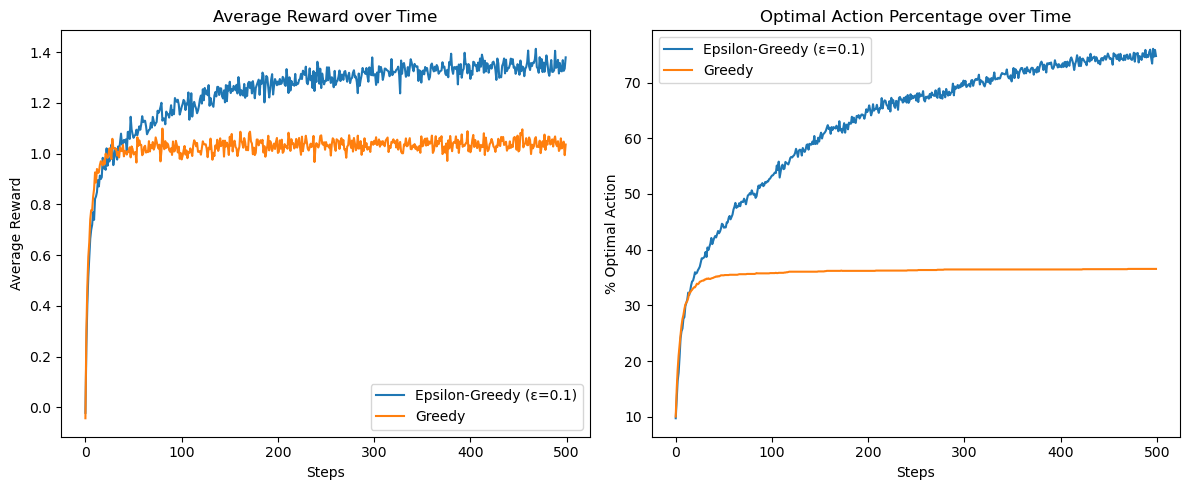

In [16]:
if __name__ == '__main__':
    results = run_simulation()
    plot_results(results)